In [ ]:
"""
CodeAlpha Internship – Task 3: Car Price Prediction with ML
 Project Objective:
 - Build a machine learning model that can predict the selling price of a used car
 - based on various features like year, model, fuel type, kilometers driven, etc.

 Tools & Libraries Used:
 - Python
 - Pandas (data handling)
 - Matplotlib, Seaborn (data visualization)
 - Scikit-learn (model building and evaluation)

 Workflow:
 1. Load and inspect the dataset
 2. Clean and preprocess the data (handle missing values, encode categorical variables)
 3. Visualize key patterns in the dataset
 4. Split the data into training and testing sets
 5. Train regression models to predict car prices
 6. Evaluate model performance using metrics like R² and MSE
"""


In [12]:
import pandas as pd                                         
import matplotlib.pyplot as plt 
import seaborn as sns                    
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder      
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score 
data= pd.read_csv(r"C:\Users\DELL\Downloads\car data.csv")
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data = data.drop(['Car_Name'], axis=1)
data['Car_Age'] = 2025 - data['Year']
data = data.drop(['Year'], axis=1)
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [8]:
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Selling_type'] = le.fit_transform(data['Selling_type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,9
297,4.00,5.90,60000,2,0,1,0,10
298,3.35,11.00,87934,2,0,1,0,16
299,11.50,12.50,9000,1,0,1,0,8


In [13]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9600991471811194
MSE: 0.9191394675409835


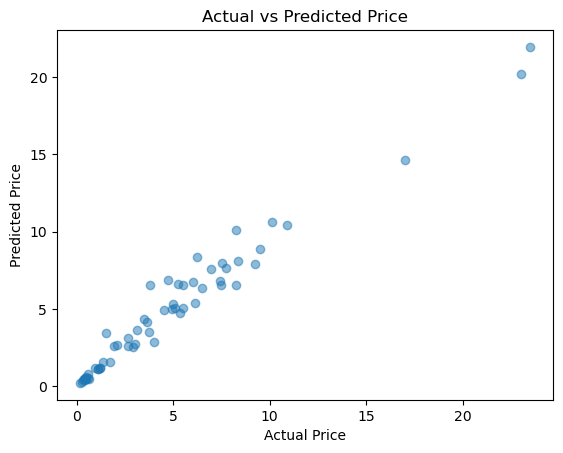

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()
